dhoni
SACHIN
SHARUK
RAHUL
prabhas
Barack_Obama_test
modi
[[326 163 309 309]
 [536 894 324 324]
 [ 89 919 321 321]]
['modi', 'dhoni', 'SHARUK']
/home/raman/deeplearningcv/WORING_AREA/StepsWatch/Results


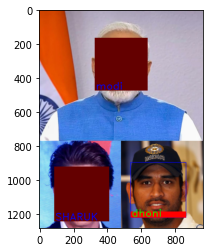

done


In [1]:
import face_recognition
import cv2
import numpy as np
import os 
import glob
import matplotlib.pyplot as plt

#-------------this list a list of people whose face , we want to mask.
blur_images=['SHARUK','modi']

#-------------

def encoding_finder(path):
    face_enc = []
    face_names=[]
    
    path=os.getcwd()+path
    for name in glob.glob(path): 
        image = face_recognition.load_image_file(name)
        img_enc = face_recognition.face_encodings(image)[0]
        face_enc.append(img_enc)
        n=str(name)
        n=name.split('/',-1)
        n=n[-1].split('.',-1)
        n=n[0]
        face_names.append(n)
        print(n)
    return face_enc,face_names
known_face_encodings ,known_face_names=encoding_finder('/KNOW_FACE_IMAGES/*')
blur_images=['SHARUK','modi']
face_locations = []
face_encodings = []
face_names = []
unique_faces=[]
process_this_frame = True
frame=cv2.imread('multiple_faces_photos/2.jpeg')

gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/home/raman/IRS/haarcascade_frontalface_default.xml')
face_1 = face_cascade.detectMultiScale(gray, 1.1, 4)
print(face_1)
face_names=[]
for (x, y, w, h) in face_1:
    s_f=frame[y:y+h+100, x:x+w]
    rgb_small_frame = s_f[:, :, ::-1]
    face_locations = face_recognition.face_locations(rgb_small_frame)
    face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)
    
    name="unknown"
    for face_encoding in face_encodings:
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]
        face_names.append(name)
print(face_names)
for (x, y, w, h),name in zip(face_1,face_names):
    if name in blur_images:
        sub_face=frame[y:y+h, x:x+w]
        #sub_face = cv2.GaussianBlur(sub_face,(23, 23), 30)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 100), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (x + 6, y+h- 6), font, 2.0, (255, 0, 0), 2)

    
    else:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.rectangle(frame, (x, y+h- 35), (x+w, y+h), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (x + 6, y+h- 6), font, 2.0, (0,255, 0), 2)
frame_RGB=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

path=os.getcwd()

p=path+'/Results'
os.chdir(p) 
print(p)
image_name='image_blur.jpg'
cv2.imwrite(image_name,frame)
plt.imshow(frame_RGB)
plt.show()
    
print("done")
    